In [1]:
import pandas as pd

data = pd.read_csv("datasets/earthquakes.csv")

data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
data = data[["Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude"]]

data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [3]:
from datetime import datetime

current_datetime = datetime.now()
current_timestamp = current_datetime.timestamp()

current_datetime, current_timestamp

(datetime.datetime(2024, 4, 30, 23, 32, 4, 158443), 1714509124.158443)

This will exclude all dates before Jan 01 1970

In [4]:
timestamps = []

for _, row in data.iterrows():
  try:
    date = row["Date"]
    time = row["Time"]

    row_datetime = date + " " + time
    row_datetime = datetime.strptime(row_datetime, "%m/%d/%Y %H:%M:%S")
    row_timestamp = row_datetime.timestamp()

    timestamps.append(row_timestamp)
  except Exception:
    timestamps.append("ValueError")

In [6]:
data = data.drop(["Date", "Time"], axis = 1)

data["Timestamp"] = timestamps

data = data[data["Timestamp"] != "ValueError"]

data["Timestamp"] = data["Timestamp"].astype(float)

data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
1457,24.185,102.543,11.3,7.1,309641.0
1458,23.984,102.732,15.0,5.9,377350.0
1459,-9.583,151.493,15.0,6.3,441354.0
1460,15.785,-59.808,36.7,6.0,536174.0
1461,-34.850,178.782,199.4,6.8,655961.0


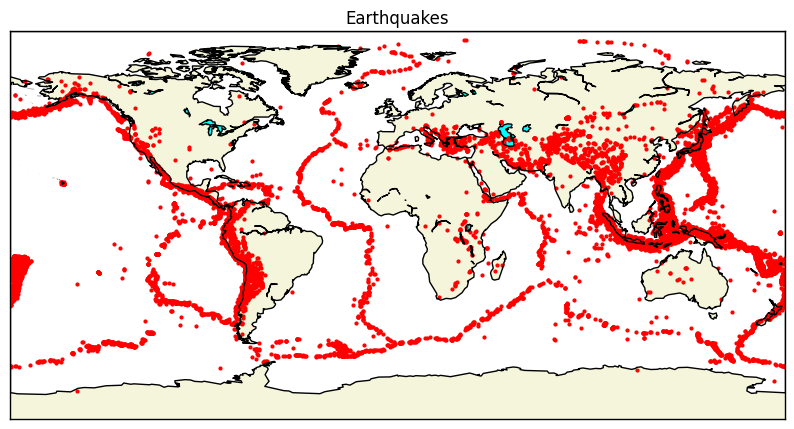

In [26]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap()

latitudes = data["Latitude"].tolist()
longitudes = data["Longitude"].tolist()

x, y = map(longitudes, latitudes)

plt.figure(figsize = (10, 12))

plt.title("Earthquakes")
map.plot(x, y, "o", markersize = 2, color = "red")

map.drawmapboundary()
map.drawcounties()
map.drawcoastlines()
map.fillcontinents(color = "beige", lake_color = "aqua")

plt.show()

In [27]:
x = data[["Latitude", "Longitude", "Timestamp"]].values
y = data[["Depth", "Magnitude"]].values

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from keras import Sequential
from keras.layers import Input, Dense, Dropout

model = Sequential([
  Input(shape = (3,)),
  Dense(64, activation = "relu"),
  Dropout(0.5),
  Dense(32, activation = "relu"),
  Dense(2, activation = "linear")
])

model.compile(optimizer = "adam", loss = "mean_absolute_error")

In [38]:
model_output = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 32.1098 - val_loss: 27.3968
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.3175 - val_loss: 27.1834
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.7833 - val_loss: 27.0744
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.6219 - val_loss: 27.0374
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.7404 - val_loss: 27.0311
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.4138 - val_loss: 27.0217
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26.8219 - val_loss: 27.0131
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.4701 - val_loss: 27.0209
Epoch 9/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.8013 - val_loss: 27.0176
Epoch 10/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27.4283 - val_loss: 27.0170
Epoch 11/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.8839 - val_loss: 27.0112
Epoch 12/20
515/515 ━━━━━━━━━━

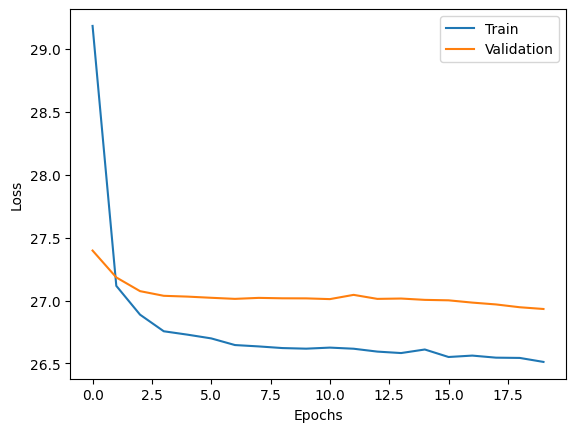

In [40]:
plt.plot(model_output.history["loss"], label = "Train")
plt.plot(model_output.history["val_loss"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [41]:
model.save("26-dumps/model.keras")

In [42]:
from joblib import dump

dump(scaler, "26-dumps/scaler.pkl")

['26-dumps/scaler.pkl']

Predict earthquake at given coordinates and datetime

In [48]:
latitude = 19
longitude = 145

current_datetime = datetime.now()
current_timestamp = current_datetime.timestamp()

sample_data = [
  [latitude, longitude, current_timestamp]
]

sample_data = scaler.transform(sample_data)

predictions = model.predict(sample_data)

depth, magnitude = predictions[0]

depth, magnitude

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


(26.755348, 5.9334717)